### Assignment 1

In [ ]:
import pandas as pd

In [4]:
df1=pd.read_csv('Week1.csv',
               index_col=False,
                skiprows=1,
                skipfooter=1,
                engine='python',
                header=None)
df1.columns = ['VD','time of measurement','value']
df1

,VD,time of measurement,value
0,VD,20210101000000,28762
1,VD,20210101000500,28859
2,VD,20210101001000,28962
3,VD,20210101001500,28992
4,VD,20210101002000,28898
...,...,...,...
1995,VD,20210107221500,36071
1996,VD,20210107222000,35857
1997,VD,20210107222500,35580
1998,VD,20210107223000,35123


In [5]:
df2=pd.read_csv('Week2.csv',
               index_col=False,
                skiprows=1,
                skipfooter=1,
                engine='python',
                header=None)
df2.columns = ['VD','time of measurement','value']
df2

,VD,time of measurement,value
0,VD,20210108000000,31569
1,VD,20210108000500,31850
2,VD,20210108001000,31808
3,VD,20210108001500,31742
4,VD,20210108002000,31622
...,...,...,...
1995,VD,20210114221500,34189
1996,VD,20210114222000,33915
1997,VD,20210114222500,33571
1998,VD,20210114223000,33261


In [6]:
frame=[df1,df2]
df3=pd.concat(frame)

df3

,VD,time of measurement,value
0,VD,20210101000000,28762
1,VD,20210101000500,28859
2,VD,20210101001000,28962
3,VD,20210101001500,28992
4,VD,20210101002000,28898
...,...,...,...
1995,VD,20210114221500,34189
1996,VD,20210114222000,33915
1997,VD,20210114222500,33571
1998,VD,20210114223000,33261


In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.3.2'

In [8]:

df3['time of measurement']=pd.to_datetime(
                                  df3['time of measurement'].astype(str),
                                  format='%Y%m%d%H%M%S')

In [9]:
df3['time of measurement']

0      2021-01-01 00:00:00
1      2021-01-01 00:05:00
2      2021-01-01 00:10:00
3      2021-01-01 00:15:00
4      2021-01-01 00:20:00
               ...        
1995   2021-01-14 22:15:00
1996   2021-01-14 22:20:00
1997   2021-01-14 22:25:00
1998   2021-01-14 22:30:00
1999   2021-01-14 22:35:00
Name: time of measurement, Length: 4000, dtype: datetime64[ns]

In [10]:
import datetime as dt
df3['day'] = df3['time of measurement'].dt.day
#df3 = df3.drop(columns = ['dayofweek'])
df3['hour'] = df3['time of measurement'].dt.hour
df_one_day = df3.loc[df3['day'] == 1] 

In [11]:
#df_one_day = df_one_day.drop(columns=['time of meausurement'])
df_one_day

,VD,time of measurement,value,day,hour
0,VD,2021-01-01 00:00:00,28762,1,0
1,VD,2021-01-01 00:05:00,28859,1,0
2,VD,2021-01-01 00:10:00,28962,1,0
3,VD,2021-01-01 00:15:00,28992,1,0
4,VD,2021-01-01 00:20:00,28898,1,0
...,...,...,...,...,...
283,VD,2021-01-01 23:35:00,26574,1,23
284,VD,2021-01-01 23:40:00,26472,1,23
285,VD,2021-01-01 23:45:00,26349,1,23
286,VD,2021-01-01 23:50:00,26127,1,23


<AxesSubplot:xlabel='hour'>

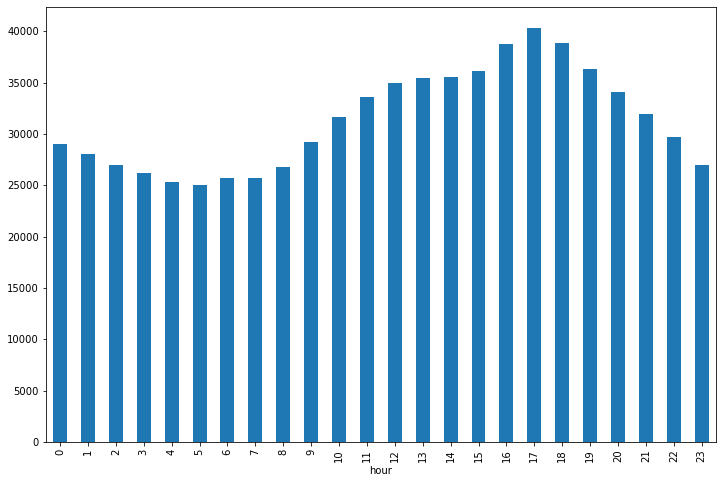

In [12]:
df_one_day
mean_hour = df_one_day.groupby('hour')['value'].mean()
plt.figure(figsize=(12,8))
mean_hour.plot(kind='bar')

In [13]:
mean_hour = df_one_day.groupby('hour')['value'].mean()
mean_hour.head(50)

hour
0     28965.500000
1     28076.166667
2     27006.000000
3     26180.750000
4     25355.750000
5     25050.000000
6     25693.083333
7     25746.250000
8     26758.416667
9     29159.416667
10    31662.666667
11    33551.333333
12    34908.750000
13    35440.750000
14    35555.916667
15    36158.666667
16    38724.916667
17    40317.083333
18    38859.083333
19    36355.333333
20    34099.916667
21    31906.583333
22    29700.583333
23    26952.916667
Name: value, dtype: float64

In [14]:
df3['date'] = df3['time of measurement'].dt.date
df3

,VD,time of measurement,value,day,hour,date
0,VD,2021-01-01 00:00:00,28762,1,0,2021-01-01
1,VD,2021-01-01 00:05:00,28859,1,0,2021-01-01
2,VD,2021-01-01 00:10:00,28962,1,0,2021-01-01
3,VD,2021-01-01 00:15:00,28992,1,0,2021-01-01
4,VD,2021-01-01 00:20:00,28898,1,0,2021-01-01
...,...,...,...,...,...,...
1995,VD,2021-01-14 22:15:00,34189,14,22,2021-01-14
1996,VD,2021-01-14 22:20:00,33915,14,22,2021-01-14
1997,VD,2021-01-14 22:25:00,33571,14,22,2021-01-14
1998,VD,2021-01-14 22:30:00,33261,14,22,2021-01-14


<AxesSubplot:xlabel='date,hour'>

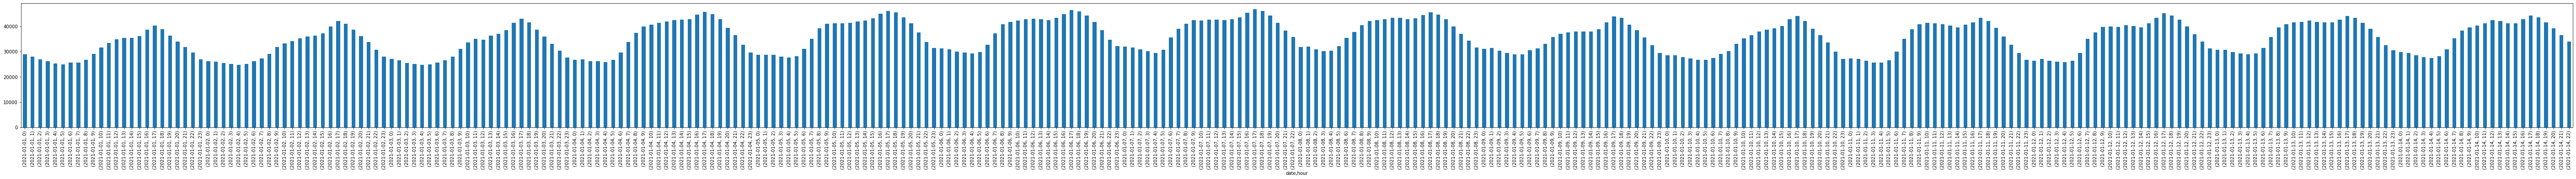

In [17]:
mean_day = df3.groupby(['date','hour'])['value'].mean()
fig = plt.figure(figsize=(100,5))
mean_day.plot(kind='bar')

____